In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
ds_root_dir = "data/torobo/trajs:2000_blocks:3_random"
file_name = "train_ds.npy"
data_file_path = os.path.join(ds_root_dir, file_name)
trajectories = np.load(data_file_path)
print("trajectories.shape", trajectories.shape)

trajectories.shape (2000, 299, 35)


In [3]:
def visualize(data1, data2, data3, idx):
    # Extract x, y, z coordinates for all datasets
    x1, y1, z1 = data1[:idx, 0], data1[:idx, 1], data1[:idx, 2]
    x2, y2, z2 = data2[:idx, 0], data2[:idx, 1], data2[:idx, 2]
    x3, y3, z3 = data3[:idx, 0], data3[:idx, 1], data3[:idx, 2]

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the first trajectory
    ax.scatter(x1, y1, z1, label='Goal 1', linestyle='-', marker='o')

    # Plot the second trajectory
    ax.scatter(x2, y2, z2, label='Goal 2', linestyle='--', marker='^')

    # Plot the third trajectory
    ax.scatter(x3, y3, z3, label='Goal 3', linestyle=':', marker='s')

    # Add labels and legend
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

    # Show the plot
    plt.show()

(2000, 3)
(2000, 3)
(2000, 3)


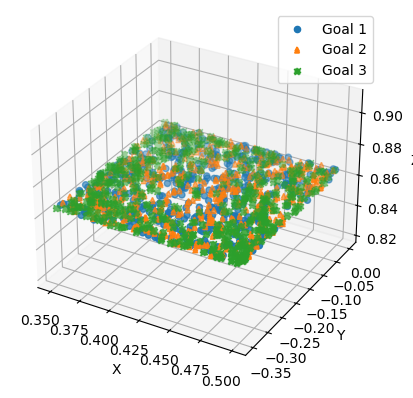

In [4]:
data1 = trajectories[:, 0, 15:18]
print(data1.shape)
data2 = trajectories[:, 0, 18:21]
print(data2.shape)
data3 = trajectories[:, 0, 21:24]
print(data3.shape)

visualize(data1, data2, data3, idx=512)

In [5]:
trajectories[:, :, 24:28][:10]

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 1.],
        [0., 0.

Split data

In [6]:
def split_data(data, split_ratio):
    n_total = data.shape[0]
    n_train = int(n_total * split_ratio)  # Number of samples in the first split

    # Generate a shuffled index array
    indices = np.random.permutation(n_total)

    # Split the indices
    train_indices = indices[:n_train]
    test_indices = indices[n_train:]

    # Create the splits
    train_data = data[train_indices]
    test_data = data[test_indices]

    return train_data, test_data


In [7]:
def save_file(array, path):
    with open(path, 'wb') as f:
        np.save(f, array)

In [8]:
ratio = 0.95
train_data, test_data = split_data(trajectories, ratio)

# Check the shapes
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

data_file_path = os.path.join(ds_root_dir, f'train_{ratio}.npy')
save_file(train_data, data_file_path)

data_file_path = os.path.join(ds_root_dir, f'test_{ratio}.npy')
save_file(test_data, data_file_path)

Train data shape: (1900, 299, 35)
Test data shape: (100, 299, 35)


(100, 3)
(100, 3)
(100, 3)


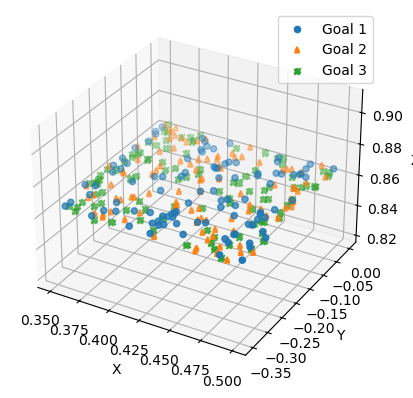

In [10]:
data1 = test_data[:, 0, 15:18]
print(data1.shape)
data2 = test_data[:, 0, 18:21]
print(data2.shape)
data3 = test_data[:, 0, 21:24]
print(data3.shape)

visualize(data1, data2, data3, idx=100)#len(data1))